#Dependencies 
- Pandas
    - pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language
- matplotlib 
    - Visualization with Python. Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python
- scipy 
    - SciPy (pronounced “Sigh Pie”) is a Python-based ecosystem of open-source software for mathematics, science, and engineering




In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import norm

# Getting the Data
- We are using `pandas` *read_excel* method for reading the excel file 
- pandas will create a dataframe we will store that dataframe in *data* varirable 
- we are using `pandas` *head* method for displaying top 5 row of that dataframe 


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/covid vaccine data set (1).xlsx')
data.head()

,STATE/UTS,DOSE1,DOSE2,TOTAL VACCINATION DOSES,VACCINATION DOSES DAY BEFORE,TOTAL POPULATION
0,Andaman and Nicobar,108556,15166,123722,123480,380581
1,Andhra Pradesh,7282314,2484464,9766778,9751848,49577103
2,Arunachal Pradesh,254719,78272,332991,332657,1383727
3,Assam,3264939,828758,4093697,4073698,31205576
4,Bihar,8465262,1779574,10244836,10203344,104099452


# Modifiying the Data For Our Use 
- We are going to visualize the probability concepts like **Normal Distribution**, **Three Sigma rule**, **z-index**
- we are going to do those things in the **percentage of people vaccinated** data
- but in our dataset we don't have percentage of people vaccinated data, so we need to Calutate it from the existing dataset 
- we can calculate the percentage of people vaccinated by dividing **number of people taken the first dose** *by* **total population of the state**
- pandas made it very easy,we can just divide the two divide two dataframe to get that 



In [ ]:
vaccinated  = data["DOSE1"]
population = data["TOTAL POPULATION"]
percentage = (vaccinated / population)* 100
percentage.head()

0    28.523757
1    14.688866
2    18.408183
3    10.462678
4     8.131899
dtype: float64

#Normal Distribution Curve

- Normal Distribution Curve Looks Like this
![Normal Distribution Curve](https://i.imgur.com/3vDS2Au.png)

> **X axis** is the value of the data 
> **Y Axix** is the probability of that Value


- To understand it better We have a example of Height normal distribution function'
- x axis is the height of the people 
- y axis is the probability to spot them 

![Height normal Distribution](https://lh5.googleusercontent.com/7HUUB3UmchZR7EKw0KYXQtwKiGgAntxIirLzgbp-g0a7xJkU0mJo978Ka70cDy8aVe13wmczRL2VvInUNZkWC3e7zlNJbKbNR5Bur1Mt)

- A normal distribution is sometimes informally called a bell curve

## Displaying the Curve Using MathPlotLib
- First we are getting **mean** and **Standard deveation** from the percentage data using `pandas` *describe* function 
- Then We are using `matplotlib` *plot* function to plot of the curve 
- We are giving sorted list of the percentage Data as **X Axis** 
- **Y-Axis**  is the is probability Density function from `Scipy`
- Then we are using `matplotlib' *show* function to show the results


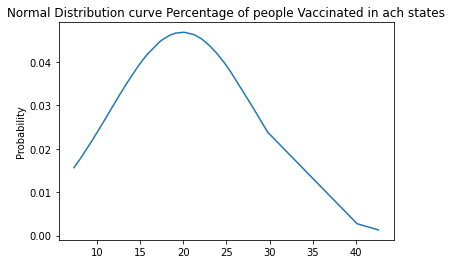

In [ ]:
stat_data  = percentage.describe()
mean = stat_data["mean"]
SD = stat_data["std"]

plt.title("Normal Distribution curve Percentage of people Vaccinated in ach states")
plt.plot(percentage.sort_values(), norm.pdf(percentage.sort_values(), mean, SD))
plt.ylabel("Probability")
plt.show()

#Three Sigma Rule
- The below image describe what is three sigma rule
- **The Three Sigma rule**, also known as the empirical rule or **68-95-99.7** rule

- The Three Sigma rule dictates that given a normal distribution, 68% of your observations will fall between one **standard deviation** of the mean. 95% will fall within two, and 99.7% will fall within three
![Three Sigma](https://i.imgur.com/Mt3RyE0.png)


- Our Dataset Doesn't perfectly fits in normal distribution but We can calculate it to find how close it is 
- We can Calculate it using the `scipy` cumulative distribution function *cdf*

- we can print the **%** of our calculations fall in between one standard deviation Distance ,two and three respectively 

In [ ]:
one_sd = norm.cdf(2*SD, mean, SD) - norm.cdf(-2*SD, mean, SD)
two_sd = norm.cdf(3 * SD, mean, SD) - norm.cdf(-3 * SD, mean, SD)
three_sd = norm.cdf(4 * SD, mean, SD) - norm.cdf(-4 * SD, mean, SD)

print(f'% of our observation falls in bettween one std distance from mean {round(one_sd,2)}%')
print(f'% of our observation falls in bettween two std distance from mean {round(two_sd,2)}%')
print(f'% of our observation falls in bettween three std distance from mean {round(three_sd,2)}%')

% of our observation falls in bettween one std distance from mean 0.37%
% of our observation falls in bettween two std distance from mean 0.75%
% of our observation falls in bettween three std distance from mean 0.95%


#Z Index

> The Z-score is a simple calculation that answers the question, “Given a data point, **how many standard deviations is it away from the mean?**” The equation below is the Z-score equation

- below gives us the formula

![z index](https://i.imgur.com/3TuDF4G.jpg)

-  Z-score doesn’t provide much information to you. It gains the most value when compared against a *Z-table*, which tabulates the **cumulative probability** of a standard normal distribution up until a given Z-score

![z index table uses](http://www.z-table.com/uploads/2/1/7/9/21795380/7807141_orig.png)
- Below is the z index Table 
![z index table](http://www.z-table.com/uploads/2/1/7/9/21795380/9340559_orig.png)


> If we can find the Z value in that table, We can find the **cumulative probability** 

- In the Python We don't need that Table `scipy` provide that in the form of `cdf` cumulative probability function 
- We can just pass the value of **Z** and find the cumulative probablity 






In [ ]:
z = (30 - mean)/SD

print(f"% of states vaccinated below 30%: {round(norm.cdf(z),2)}")
print(f"% of states vaccinated above 30%: {round(1 - norm.cdf(z),2)}")

% of states vaccinated below 30%: 0.88
% of states vaccinated above 30%: 0.12
